In [1]:
import torch
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)


In [2]:
# 定义模型
def model(t_u,w,b):
    return w * t_u + b

## 定义损失函数
def loss_fun(t_p,t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean() ## 对损失误差的标量求平均值    得到标量损失函数


## 初始化参数 调用模型
w = torch.ones(1)
b = torch.zeros(1)

t_p = model(t_u,w,b)  ## 计算预测值
print(t_p)  ## 张量

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])


In [3]:
## 计算损失函数的值

loss = loss_fun(t_p,t_c)
print(loss)

tensor(1763.8848)


In [6]:
delta = 0.1  ## 变化幅度
loss_rate_of_change_w = (loss_fun(model(t_u,w + delta,b),t_c) - loss_fun(model(t_u,w - delta,b),t_c)) / (2.0 * delta)

## 定义学习率
learning_rate = 1e-2
w = w - loss_rate_of_change_w * learning_rate  ## 更新参数w
print(w)

tensor([2567.5269])


In [7]:
loss_rate_of_change_b = (loss_fun(model(t_u,w,b + delta),t_c) - loss_fun(model(t_u,w,b - delta),t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b
print(b)

tensor([-2560.])


In [11]:
## 计算损失函数对模型的输出的偏导数
def dloss_fun(t_p,t_c):
    dsq_diffs = 2 * (t_p - t_c)
    return dsq_diffs

## 计算输出对参数w的偏导数
def dmodel_dw(t_u,w,b):
    return t_u

## 计算输出对参数b的偏导数
def dmodel_db(t_u,w,b):
    return 1.0

## 计算梯度
def grad_fn(t_u,t_c,t_p,w,b):
    dloss_dw = dloss_fun(t_p,t_c) * dmodel_dw(t_u,w,b)
    dloss_db = dloss_fun(t_p,t_c) * dmodel_db(t_u,w,b)



    return torch.stack([dloss_dw.mean(),dloss_db.mean()])  ## 计算均值 将梯度张量 转换成梯度标量



## 从参数的固定值开始 迭代地对其应用更新以进行固定次数的迭代或者直到w和b停止改变为止
## 所有训练样本上的一次参数更新迭代称之为一个epoch


## 这里指定了参数更新的迭代次数
def training_loop(n_epochs,learning_rate,params,t_u,t_c,print_params = True,verbose = 1):
    for epoch in range(1,n_epochs + 1):
        w,b = params## 获取参数

        # 计算预测值
        t_p = model(t_u,w,b)  # 前向传播
        loss = loss_fun(t_p,t_c)  ## 计算损失

        grad = grad_fn(t_u,t_c,t_p,w,b)  # 反向传播

        params = params - learning_rate * grad  ## 参数更新

        ## 
        if epoch % verbose == 0:
            print('Epoch %d,Loss %f' % (epoch,float(loss)))

          
            if epoch % verbose == 0:
                print('Epoch %d, Loss %f' % (epoch, float(loss)))
                if print_params:
                    print('    Params: ', params)
                    print('    Grad  : ', grad)

    return params


In [12]:
training_loop(n_epochs=10,learning_rate=1e-4,params=torch.tensor([1.0,0.0]),t_u = t_u,t_c = t_c)

## 权重w和b 的梯度差别太大，因此权重和偏差存在于不同的比例空间 学习率只能更新一个 不能满足另一个

Epoch 1,Loss 1763.884766
Epoch 1, Loss 1763.884766
    Params:  tensor([ 0.5483, -0.0083])
    Grad  :  tensor([4517.2964,   82.6000])
Epoch 2,Loss 323.090515
Epoch 2, Loss 323.090515
    Params:  tensor([ 0.3623, -0.0118])
    Grad  :  tensor([1859.5492,   35.7843])
Epoch 3,Loss 78.929634
Epoch 3, Loss 78.929634
    Params:  tensor([ 0.2858, -0.0135])
    Grad  :  tensor([765.4666,  16.5122])
Epoch 4,Loss 37.552845
Epoch 4, Loss 37.552845
    Params:  tensor([ 0.2543, -0.0143])
    Grad  :  tensor([315.0790,   8.5787])
Epoch 5,Loss 30.540283
Epoch 5, Loss 30.540283
    Params:  tensor([ 0.2413, -0.0149])
    Grad  :  tensor([129.6733,   5.3127])
Epoch 6,Loss 29.351154
Epoch 6, Loss 29.351154
    Params:  tensor([ 0.2360, -0.0153])
    Grad  :  tensor([53.3496,  3.9682])
Epoch 7,Loss 29.148884
Epoch 7, Loss 29.148884
    Params:  tensor([ 0.2338, -0.0156])
    Grad  :  tensor([21.9304,  3.4148])
Epoch 8,Loss 29.113848
Epoch 8, Loss 29.113848
    Params:  tensor([ 0.2329, -0.0159])
    

tensor([ 0.2324, -0.0166])

In [18]:
## 规范化梯度  更改输入使梯度差别不要太大
t_un = 0.1 * t_u  ## 规范化输入
params = training_loop(n_epochs=5000,learning_rate=1e-2,params=torch.tensor([1.0,0.0]),t_u = t_un,t_c = t_c)

Epoch 1,Loss 80.364342
Epoch 1, Loss 80.364342
    Params:  tensor([1.7761, 0.1064])
    Grad  :  tensor([-77.6140, -10.6400])
Epoch 2,Loss 37.574917
Epoch 2, Loss 37.574917
    Params:  tensor([2.0848, 0.1303])
    Grad  :  tensor([-30.8623,  -2.3864])
Epoch 3,Loss 30.871077
Epoch 3, Loss 30.871077
    Params:  tensor([2.2094, 0.1217])
    Grad  :  tensor([-12.4631,   0.8587])
Epoch 4,Loss 29.756193
Epoch 4, Loss 29.756193
    Params:  tensor([2.2616, 0.1004])
    Grad  :  tensor([-5.2218,  2.1327])
Epoch 5,Loss 29.507153
Epoch 5, Loss 29.507153
    Params:  tensor([2.2853, 0.0740])
    Grad  :  tensor([-2.3715,  2.6310])
Epoch 6,Loss 29.392456
Epoch 6, Loss 29.392456
    Params:  tensor([2.2978, 0.0458])
    Grad  :  tensor([-1.2492,  2.8241])
Epoch 7,Loss 29.298828
Epoch 7, Loss 29.298828
    Params:  tensor([2.3059, 0.0168])
    Grad  :  tensor([-0.8071,  2.8970])
Epoch 8,Loss 29.208717
Epoch 8, Loss 29.208717
    Params:  tensor([ 2.3122, -0.0124])
    Grad  :  tensor([-0.6325,  2

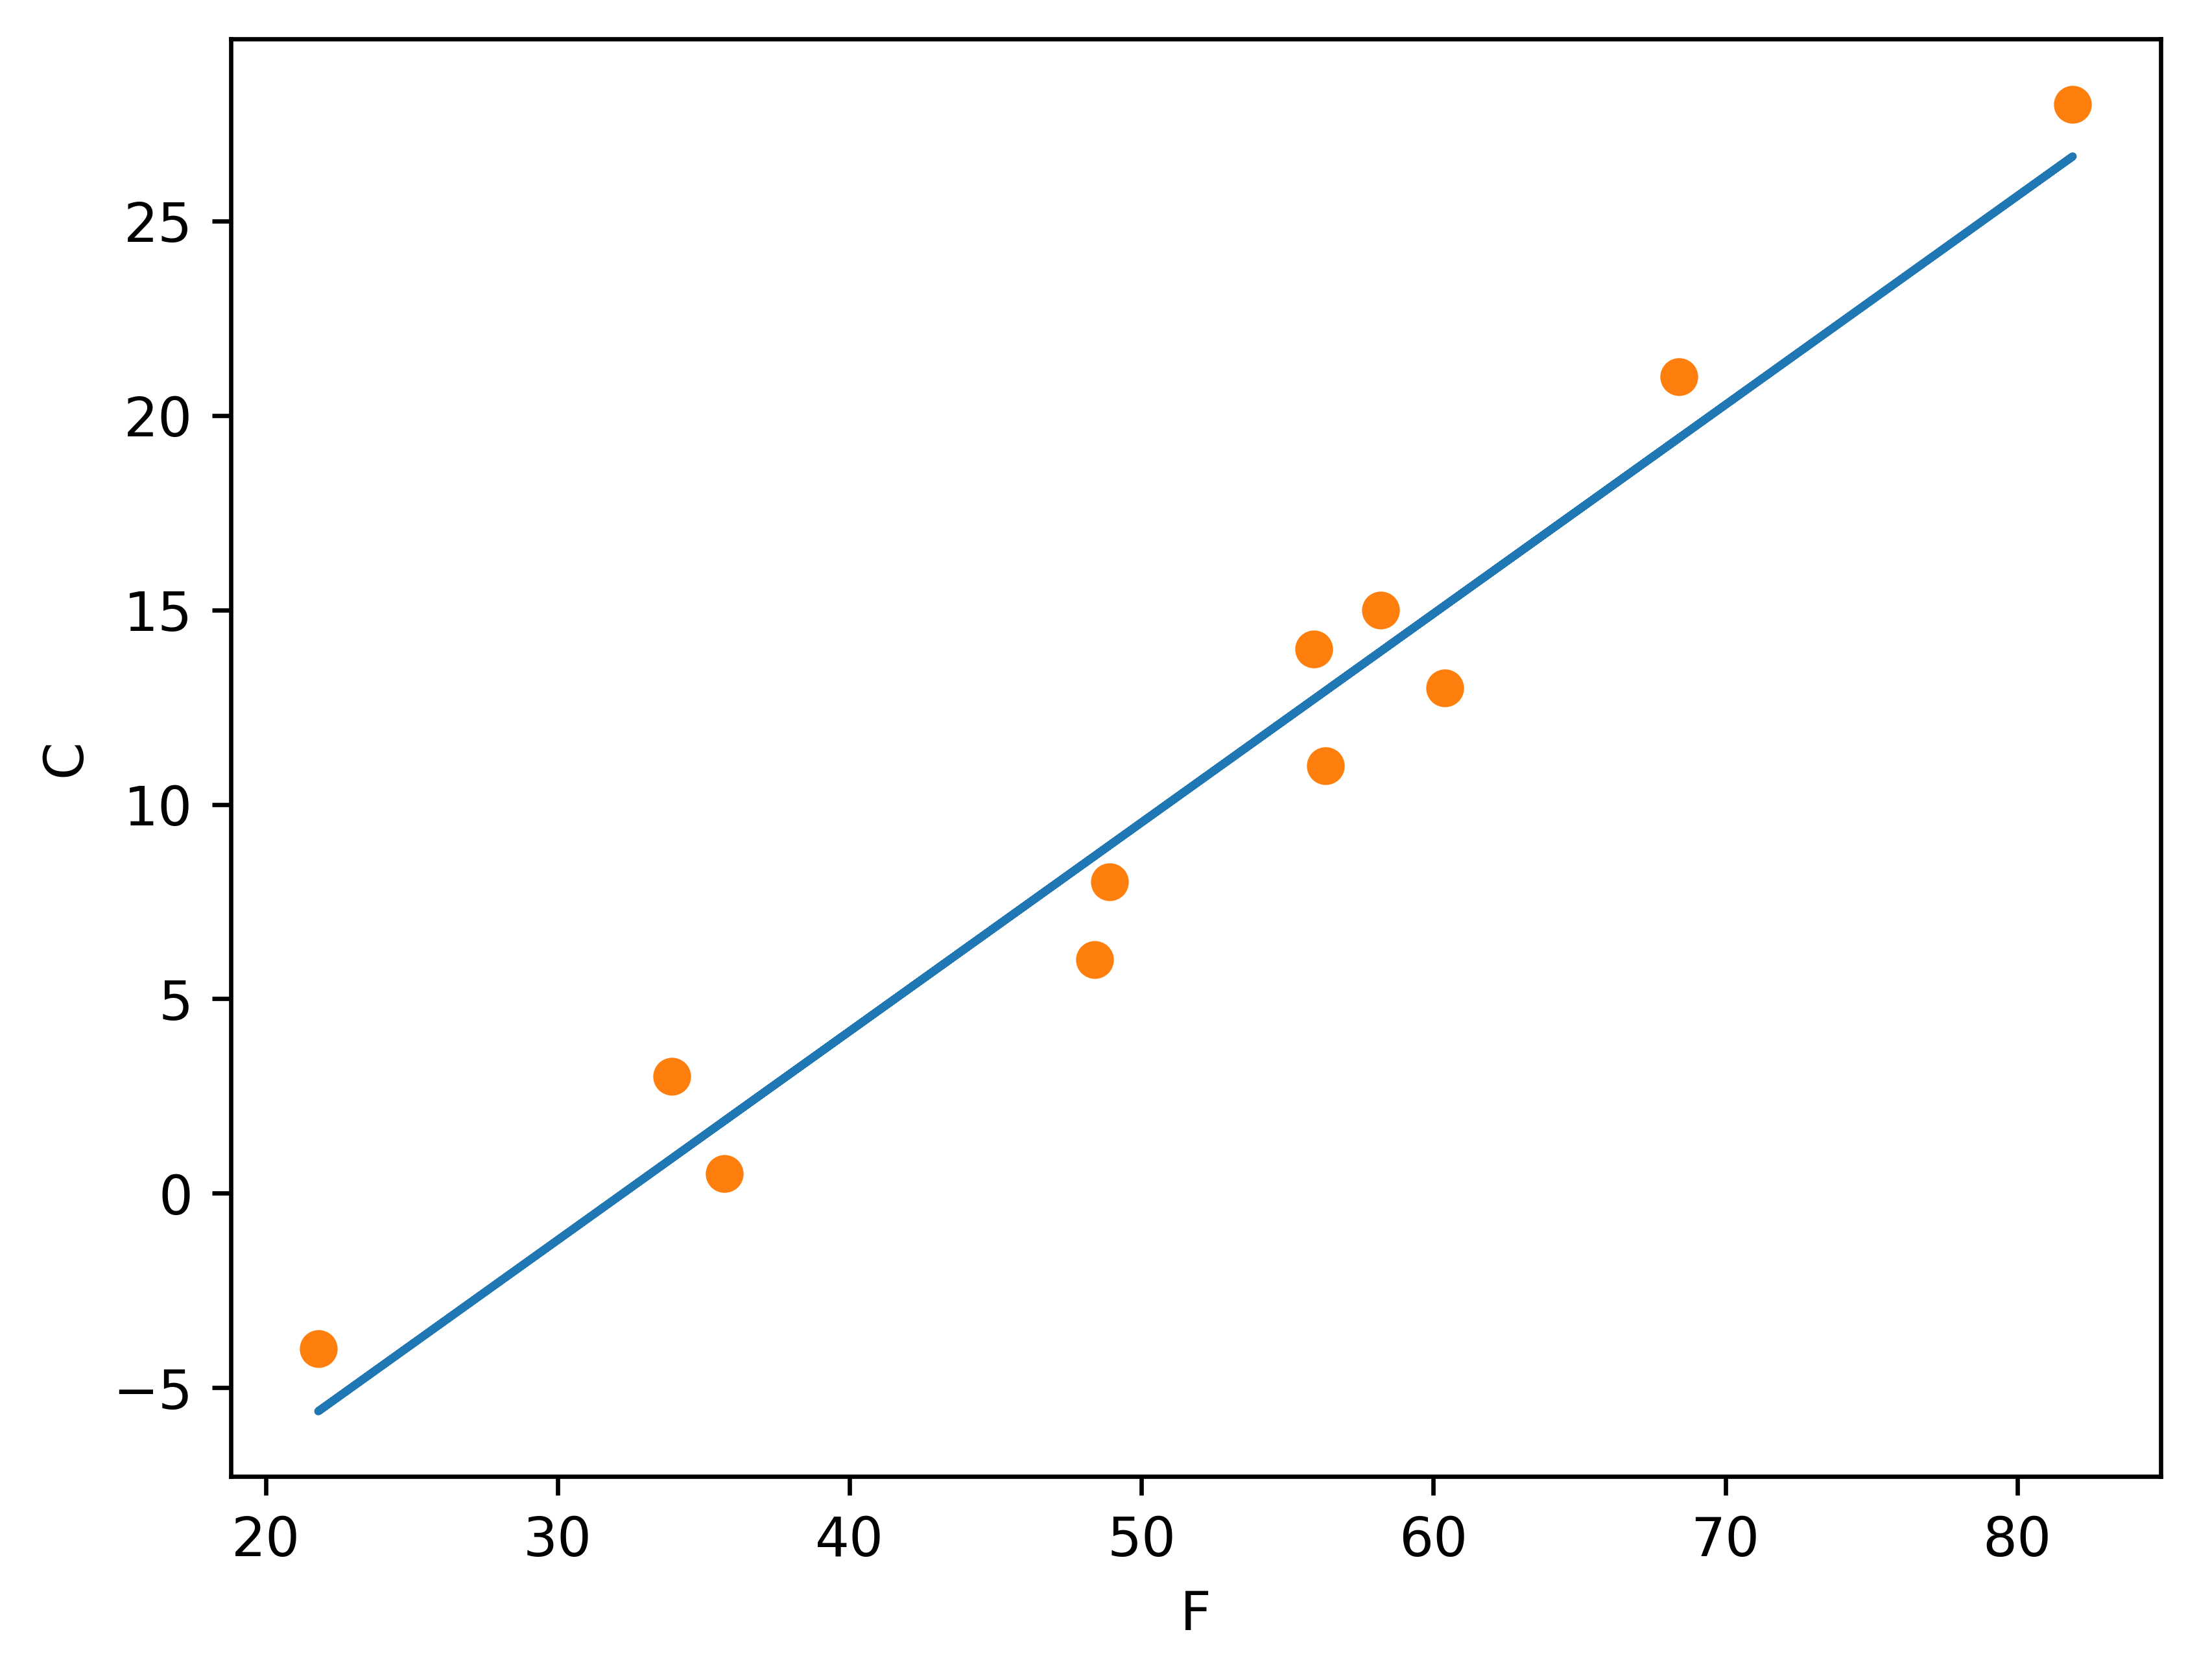

In [20]:
%matplotlib inline

from matplotlib import pyplot as plt

t_p = model(t_un,*params) 

fig = plt.figure(dpi = 600)
plt.xlabel("F")
plt.ylabel("C")

plt.plot(t_u.numpy(),t_p.detach().numpy())
plt.plot(t_u.numpy(),t_c.numpy(),'o')
 